In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Criando o conjunto de dados fictício
data = pd.DataFrame({
    'Vibração (mm/s)': [3.2, 4.0, 3.7, 5.5, 6.2, 2.1, 2.8, 1.9, 7.3, 6.8, 2.4, 5.9, 4.5, 2.6, 4.8, 3.4, 6.1, 2.0, 5.0, 7.0],
    'Corrente (A)': [12.5, 14.2, 11.8, 15.6, 17.0, 10.2, 9.5, 8.8, 18.4, 17.8, 10.8, 16.2, 13.4, 9.9, 13.9, 11.5, 16.7, 8.6, 14.8, 18.0],
    'Temperatura (°C)': [50.0, 51.2, 48.5, 53.1, 56.8, 45.7, 43.2, 41.6, 59.3, 57.9, 46.9, 54.7, 49.7, 44.5, 50.8, 47.3, 55.4, 41.0, 52.3, 58.7],
    'Classe': ['Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Defeituosa', 'Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Não Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa']
})

# Separando as características e o rótulo
X = data[['Vibração (mm/s)', 'Corrente (A)', 'Temperatura (°C)']]

y = data['Classe']

# Dividindo o conjunto de dados em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando um modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)

# Exibindo os resultados
print(f'Acurácia do Modelo SVM: {accuracy}')
print('Relatório de Classificação:')
print(classification_rep)

Acurácia do Modelo SVM: 1.0
Relatório de Classificação:
                precision    recall  f1-score   support

    Defeituosa       1.00      1.00      1.00         2
Não Defeituosa       1.00      1.00      1.00         4

      accuracy                           1.00         6
     macro avg       1.00      1.00      1.00         6
  weighted avg       1.00      1.00      1.00         6



In [8]:
print(cm)

[[2 0]
 [0 4]]


<Axes: >

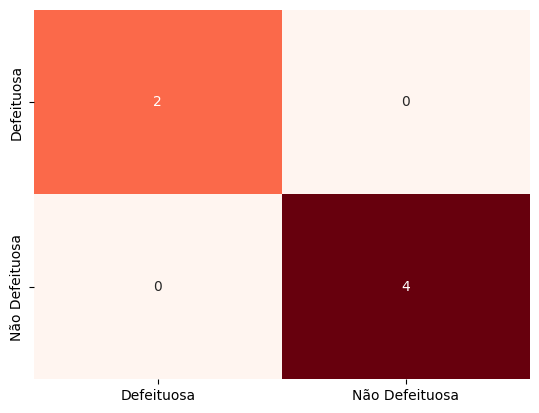

In [10]:

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Defeituosa', 'Não Defeituosa'], yticklabels=['Defeituosa', 'Não Defeituosa'])

In [ ]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Defeituosa": "red", "Não Defeituosa": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vibração (mm/s)', y='Corrente (A)', hue='Classe', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Vibração vs. Corrente (Classe de Defeito)')
plt.xlabel('Vibração (mm/s)')
plt.ylabel('Corrente (A)')

# Mostrando o gráfico
plt.legend(title='Classe')
plt.show()